In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("spam.csv",encoding='cp1252')   #With UTF coding this was not opening so I had to open in another encoding

In [3]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# 1.Datacleaning
# 2.EDA
# 3.Text preprocessing
# 4.Model building
# 5.Evaluation
# 6.Improvements
# 7.Website
# 8.Deployment

## 1.Data Cleaning

In [6]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
4424,ham,Just now saw your message.it k da:)
1405,ham,K..k..any special today?
446,ham,"Well done, blimey, exercise, yeah, i kinda rem..."
4248,ham,Loosu go to hospital. De dont let it careless.
3343,ham,Oh great. I.ll disturb him more so that we can...


In [9]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
df.sample(5)

,target,text
3258,spam,Congratulations! Thanks to a good friend U hav...
3634,ham,It's not that you make me cry. It's just that ...
4038,ham,I cant pick the phone right now. Pls send a me...
5364,spam,Call 09095350301 and send our girls into eroti...
2276,ham,Love you aathi..love u lot..


In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['target']=le.fit_transform(df['target'])

In [12]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.duplicated().sum()

403

In [14]:
df.drop_duplicates(inplace=True)

## 2.EDA

In [15]:
#check if its a balanced data or not 

In [16]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

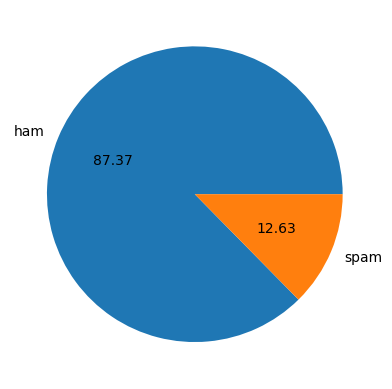

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [18]:
#clearly data is imbalanced

In [19]:
#let us make 3 new columns for counting the characters, words, sentences

In [20]:
!pip install nltk

In [21]:
import nltk

In [22]:
df['num_characters']=df['text'].apply(lambda x:len(x))

In [23]:
#df['num_words']=df['text'].apply(lambda x:len(x.split(" ")))   This is wrong because if the words are separated by . or punctuation, this will not workout

In [24]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mrchi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
df['num_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


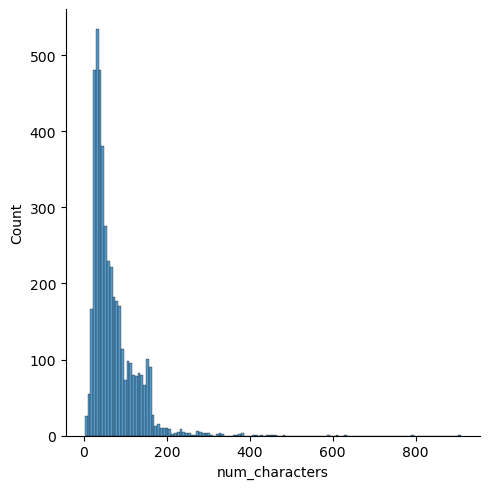

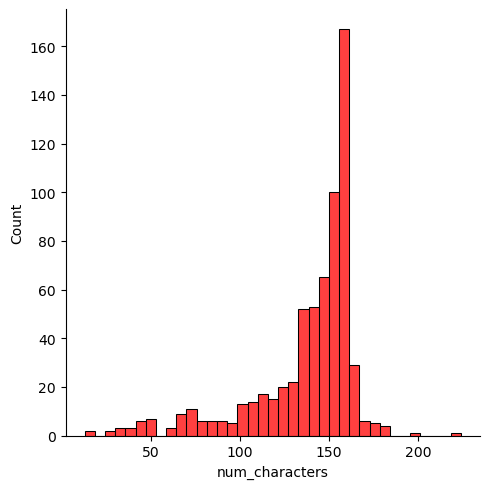

In [29]:
import seaborn as sns
sns.displot(data=df,kind='hist',x=df[df['target']==0]['num_characters'])
sns.displot(data=df,kind='hist',x=df[df['target']==1]['num_characters'],color='red')

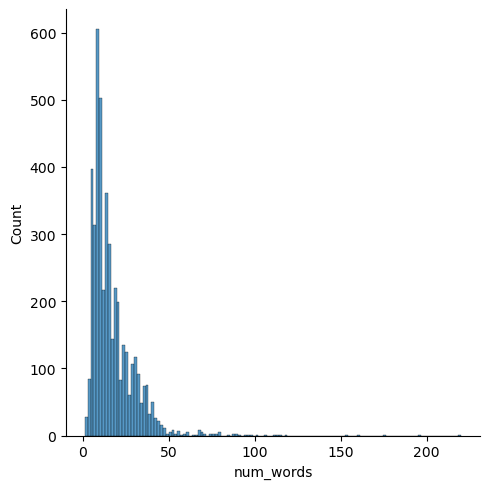

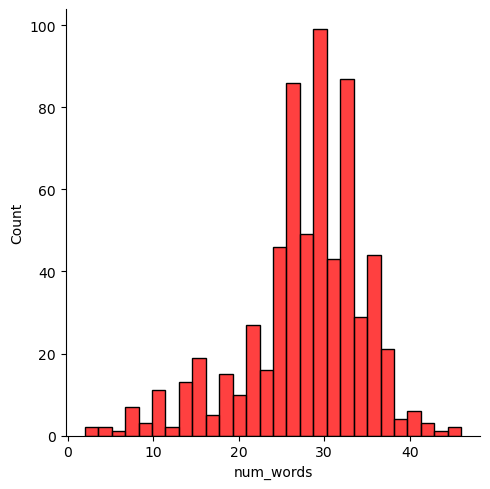

In [30]:
sns.displot(data=df,kind='hist',x=df[df['target']==0]['num_words'])
sns.displot(data=df,kind='hist',x=df[df['target']==1]['num_words'],color='red')

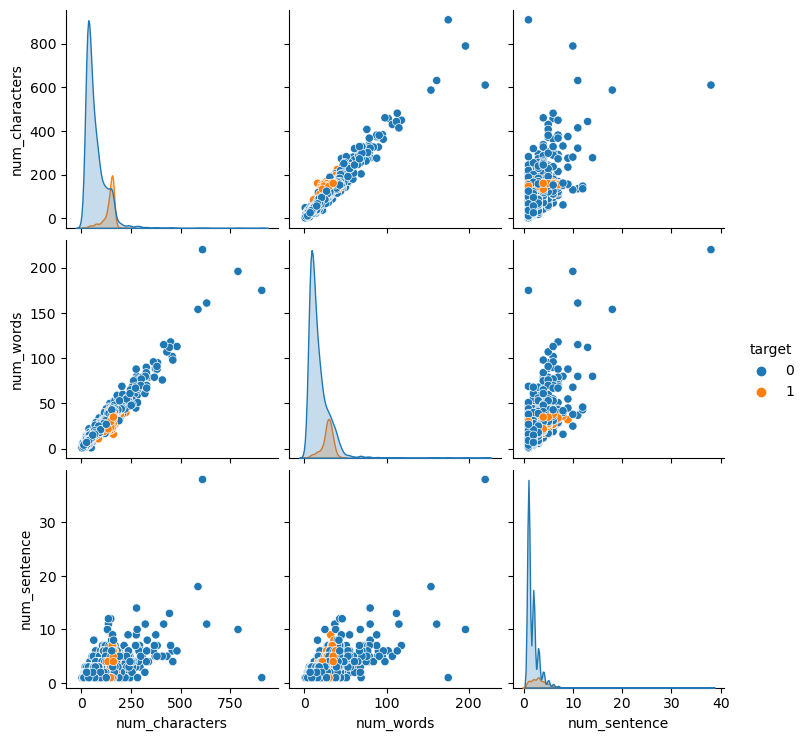

In [31]:
sns.pairplot(data=df,hue='target')

<Axes: >

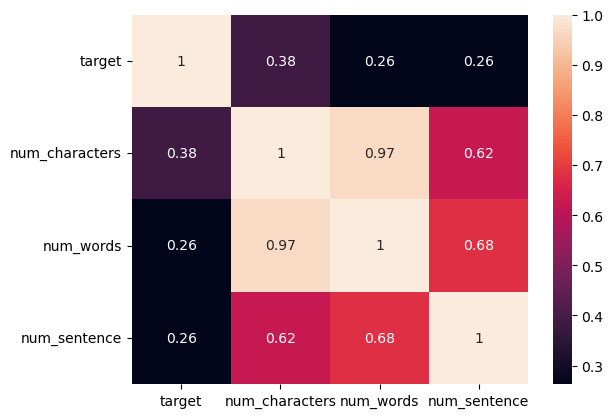

In [32]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

## 3 Text preprocessing
        . Lower case
        . Tokenize
        . Removing special characters
        . Stop words and punctuations
        . Stemming

In [33]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('English')
from nltk.stem import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mrchi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
def text_prep(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]                              #we cannot copy list directly as they are mutable
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]                              #we cannot copy list directly as they are mutable
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [36]:
text_prep("I love the YT lectures")

'love yt lectur'

In [37]:
df['transformed_text']=df['text'].apply(text_prep)

In [38]:
df

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


## word cloud building

In [39]:
from wordcloud import WordCloud
wc=WordCloud(width=1000,height=1000,min_font_size=10,background_color='white')

In [40]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

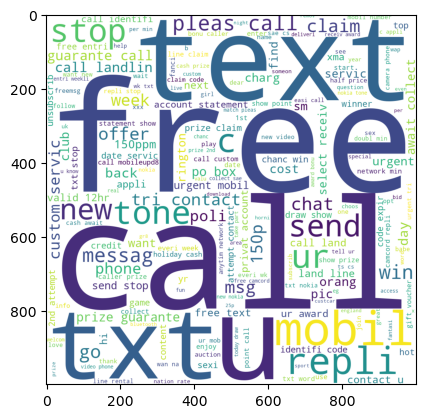

In [41]:
plt.imshow(spam_wc)

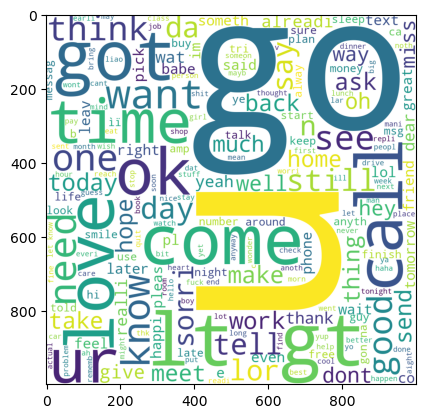

In [42]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

## 3.Model building
      Lets start with Naives bayes and then try to improve the model

In [43]:
#first we need to vectorize the words in transformed text 

In [44]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [45]:
tv=TfidfVectorizer()
X=tv.fit_transform(df['transformed_text']).toarray()

In [46]:
# cv=CountVectorizer()
# X=cv.fit_transform(df['transformed_text']).toarray()

In [47]:
X.shape

(5169, 6708)

In [48]:
y=df['target'].values

In [49]:
y.shape

(5169,)

In [50]:
X.shape

(5169, 6708)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [53]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score

In [54]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [55]:
gnb.fit(X_train,y_train)

GaussianNB()

In [56]:
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [57]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [58]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [59]:
#count vectorizer -->bernauli has performed well

In [60]:
#tfidf vectoriser + MNB is performing even better with precision of 1

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [62]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [67]:
# clfs = {
#     'SVC' : svc,
#     'KN' : knc, 
#     'NB': mnb, 
#     'DT': dtc, 
#     'LR': lrc, 
#     'RF': rfc, 
#     'AdaBoost': abc, 
#     'BgC': bc, 
#     'ETC': etc,
#     'GBDT':gbdt,
#     'xgb':xgb
# }
my_model_list=[['SVC',svc],['KN',knc],['NB',mnb],['DT',dtc],['LR',lrc],['RF',rfc],['AdaBoost',abc],['BgC',bc],['GBDT',gbdt],['xgb',xgb]]


In [68]:
model=[]
model_accuracy=[]
model_precision=[]
model_train_time=[]
import time

for i in my_model_list:
    start_time=time.time()
    i[1].fit(X_train,y_train)
    y_pred=i[1].predict(X_test)
    end_time=time.time()
    
    model.append(i[0])
    model_accuracy.append(accuracy_score(y_test,y_pred))
    model_precision.append(precision_score(y_test,y_pred))
    model_train_time.append(end_time-start_time)             #time is in seconds
    
#     start_time.clear()
#     end_time.clear()
    
#     print(i[1])    
#     print(accuracy_score(y_test,y_pred))
#     print(confusion_matrix(y_test,y_pred))
#     print(precision_score(y_test,y_pred))
#     print("____________________________________________________________")


comparision_table = pd.DataFrame(list(zip(model,model_accuracy,model_precision,model_train_time)),columns =['Model', 'Model_Accuracy','Model_Precision','Model_Train_Time'])
comparision_table

,Model,Model_Accuracy,Model_Precision,Model_Train_Time
0,SVC,0.972921,0.974138,13.037375
1,KN,0.900387,1.000000,0.741045
2,NB,0.959381,1.000000,0.080203
3,DT,0.936170,0.846154,1.087552
4,LR,0.951644,0.940000,0.113131
5,RF,0.971954,1.000000,6.196892
6,AdaBoost,0.961315,0.945455,17.806920
7,BgC,0.958414,0.862595,168.266396
8,GBDT,0.952611,0.923810,31.833439
9,xgb,0.972921,0.943548,1.702129
